In [1]:
import pandas as pd
import seaborn as sns


In [2]:
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"
df = pd.read_csv(url)
#Scaricando il dataset

In [3]:
df.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


In [5]:
df.shape


(547060, 61)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547060 entries, 0 to 547059
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     547060 non-null  object 
 1   date                                        547060 non-null  object 
 2   total_cases                                 533856 non-null  float64
 3   new_cases                                   530308 non-null  float64
 4   new_cases_smoothed                          529099 non-null  float64
 5   total_cases_per_million                     533856 non-null  float64
 6   new_cases_per_million                       530308 non-null  float64
 7   new_cases_smoothed_per_million              529099 non-null  float64
 8   total_deaths                                533856 non-null  float64
 9   new_deaths                                  531235 non-null  float64
 

In [8]:
df.isna().sum()

country                            0
date                               0
total_cases                    13204
new_cases                      16752
new_cases_smoothed             17961
                               ...  
extreme_poverty               196369
diabetes_prevalence            85365
handwashing_facilities        298956
hospital_beds_per_thousand    216085
human_development_index       547060
Length: 61, dtype: int64

In [9]:
df[['continent', 'total_cases']].isna().sum()# quantificando i null per decidere cosa fare

continent      40960
total_cases    13204
dtype: int64

In [10]:
total_righe=df.shape[0]
percent_cont_null=(40960/total_righe)*100
percent_tot_cas_null=(13204/total_righe)*100   # trovando il % di nulli in base ai dati totali
percent_cont_null, percent_tot_cas_null

(7.48729572624575, 2.413629218001682)

In [11]:
df_pulita = df.dropna(subset=['continent', 'total_cases'])
df_pulita

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
5,Afghanistan,2020-01-06,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
6,Afghanistan,2020-01-07,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
7,Afghanistan,2020-01-08,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578847.0,62.215549,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547055,Zimbabwe,2025-11-12,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547056,Zimbabwe,2025-11-13,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547057,Zimbabwe,2025-11-14,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN
547058,Zimbabwe,2025-11-15,266436.0,0.0,0.0,16580.682,0.0,0.0,5740.0,0.0,...,16069061.0,41.538223,17.683001,62.360100,2207.957031,49.219894,2.1,42.456093,1.70,NaN


In [12]:
df_pulita.shape # controllando la dimensione dopo pulizia

(499552, 61)

In [18]:
df_paesi=df_pulita.sort_values('date').groupby('country').tail(1) # cosi avremo un record per ogni paesi con total cases
df_paesi.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
232215,Isle of Man,2025-11-16,38008.0,0.0,0.000000,451680.38,0.0,0.000000,116.0,0.0,...,84148.0,147.628067,45.476002,80.956100,NaN,NaN,6.3,NaN,NaN,NaN
213328,Honduras,2025-11-16,473040.0,0.0,0.142857,45206.94,0.0,0.013652,11114.0,0.0,...,10463880.0,93.519348,23.205999,72.715103,5709.124023,15.717371,5.1,84.963562,0.64,NaN
234362,Israel,2025-11-16,4841647.0,0.0,1.000000,531865.44,0.0,0.109852,12707.0,0.0,...,9103143.0,420.662811,29.086000,82.814499,44393.300781,0.720746,8.5,NaN,2.98,NaN
304344,Mauritius,2025-11-16,332086.0,0.0,0.000000,260228.16,0.0,0.000000,1074.0,0.0,...,1276134.0,639.025513,36.513000,73.544502,22841.349609,0.540192,22.6,NaN,3.40,NaN
187559,Greece,2025-11-16,5835609.0,0.0,321.571440,560443.70,0.0,30.883266,40141.0,0.0,...,10412481.0,80.779526,45.390999,79.944099,31704.425781,0.594283,6.4,NaN,4.20,NaN


In [ ]:
#calcolando il numero di casi per ogni continente fin dall'inizio della pandemia

In [20]:
casi_per_continent = df_paesi.groupby('continent')['total_cases'].sum()
casi_per_continent

continent
Africa            13063504.0
Asia             302173617.0
Europe           254816240.0
North America    124516750.0
Oceania           15032781.0
South America     69249767.0
Name: total_cases, dtype: float64

In [ ]:

# trasformare il totale per continenti in percentuale in relazione al totale mondiale

In [21]:
totale_mondiale=casi_per_continent.sum()
totale_mondiale

778852659.0

In [24]:
percentuali_continente=(casi_per_continent/totale_mondiale)*100
percentuali_continente

continent
Africa            1.677275
Asia             38.797276
Europe           32.716874
North America    15.987202
Oceania           1.930119
South America     8.891254
Name: total_cases, dtype: float64

In [25]:
percentuali_continente.round(2)

continent
Africa            1.68
Asia             38.80
Europe           32.72
North America    15.99
Oceania           1.93
South America     8.89
Name: total_cases, dtype: float64

In [26]:
df_percentuali=percentuali_continente.reset_index()
df_percentuali.columns = ['continent', 'percentuale']  #criando un dataframe per il grafico
df_percentuali

,continent,percentuale
0,Africa,1.677275
1,Asia,38.797276
2,Europe,32.716874
3,North America,15.987202
4,Oceania,1.930119
5,South America,8.891254


<Axes: xlabel='continent', ylabel='percentuale'>

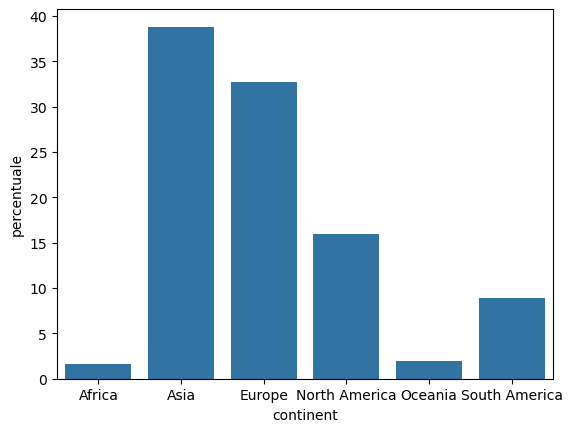

In [27]:
sns.barplot(data=df_percentuali, x='continent', y='percentuale')

In [ ]:

#Esercizio 3 - Selezionare i dati relativi all'italia nell 2022
#L'evoluzione dei casi totali dall'inizio alla fine dell'anno

In [ ]:
#Filtrare lìItalia e anno 2022 e convertire la colonna in datetime, di formato stringa a date

In [28]:
df_pulita['date']=pd.to_datetime(df_pulita['date'])

C:\Users\karin\AppData\Local\Temp\ipykernel_52260\2835359956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pulita['date']=pd.to_datetime(df_pulita['date'])


In [29]:
italia_2022=df_pulita[(df_pulita['country']=='Italy') & (df_pulita['date'].dt.year==2022)]
italia_2022.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
235100,Italy,2022-01-01,6125683.0,144255.0,79719.86,102746.98,2419.6104,1337.1528,137402.0,155.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235101,Italy,2022-01-02,6267035.0,141352.0,92086.29,105117.90,2370.9177,1544.5768,137513.0,111.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235102,Italy,2022-01-03,6328076.0,61041.0,97251.86,106141.74,1023.8496,1631.2196,137646.0,133.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235103,Italy,2022-01-04,6396110.0,68034.0,102571.14,107282.89,1141.1443,1720.4408,137786.0,140.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN
235104,Italy,2022-01-05,6566947.0,170837.0,115790.71,110148.37,2865.4740,1942.1746,138045.0,259.0,...,59619106.0,201.608658,47.116001,82.052002,44292.191406,0.927227,6.4,NaN,3.14,NaN


<Axes: xlabel='date', ylabel='total_cases'>

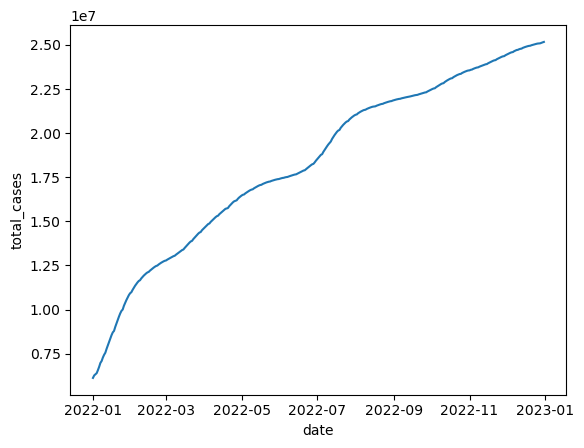

In [30]:
sns.lineplot(data=italia_2022, x='date', y='total_cases')

In [ ]:
#Il numero di nuovi casi rispetto alla data


In [31]:
italia_2022['new_cases'].isna().sum() #controllando i nulli sulla colonna new_cases

0

<Axes: xlabel='date', ylabel='new_cases'>

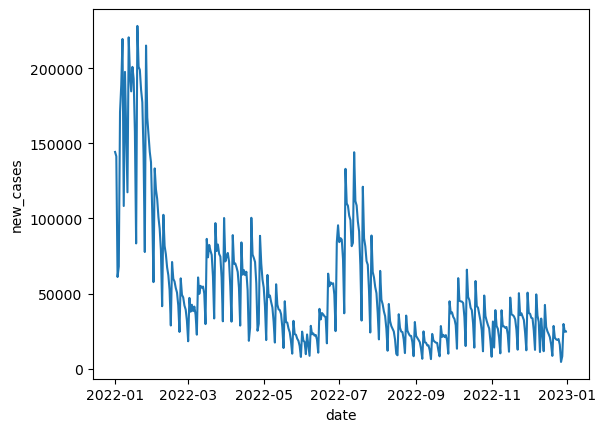

In [32]:
sns.lineplot(data=italia_2022, x='date', y='new_cases')

In [ ]:
#Il grafico è abbastanza diverso dal primo perche mostra l'andamento giornaliero dei contaggi in Italia nel 2022,
#ed è caratterizzato da pichi e discese, a differenza del totale cumulato che cresce sempre.

In [ ]:
#Esercizio 4 - Grafico Italia, Germania e Francia di maggio a aprile 2023 dei pacienti in terapia intensiva

In [35]:
[col for col in df.columns if 'icu' in col.lower()] # cerchando la colonna nell dataset originale

['icu_patients',
 'icu_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million']

In [90]:
#filtrando solo i paesi di interesse
df_paesi = df[(df['country']=='Italy') |
                (df['country']=='Germany') |    # filtrando i paesi
                (df['country']=='France') ]
                
df_paesi.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
166075,France,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166076,France,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166077,France,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166078,France,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166079,France,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN


In [ ]:

#Filtrare il periodo richiesto: da maggio 2022 a aprile 2023


In [92]:
# filtrando il periodo
df_periodo=df_paesi[(df_paesi['date']>='2022-05-01') & (df_paesi['date'] <= '2023-04-30')]
df_periodo.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
166926,France,2022-05-01,27742592.0,376510.0,53787.145,431607.16,5857.5786,836.79694,146744.0,867.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166927,France,2022-05-02,27742592.0,0.0,53787.145,431607.16,0.0000,836.79694,146744.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166928,France,2022-05-03,27742592.0,0.0,53787.145,431607.16,0.0000,836.79694,146744.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166929,France,2022-05-04,27742592.0,0.0,53787.145,431607.16,0.0000,836.79694,146744.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166930,France,2022-05-05,27742592.0,0.0,53787.145,431607.16,0.0000,836.79694,146744.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN


In [93]:
df_periodo.shape

(1095, 61)

In [ ]:

# controllare i nulli in icu_patients


In [94]:
df_periodo['icu_patients'].isna().sum()

30

In [99]:
#controllando dove sono i null per Italia

df_periodo[(df_periodo['country']=='Italy') & (df_periodo['icu_patients'].isna())].shape[0]

0

In [100]:
#controllando dove sono i null per Germania

df_periodo[(df_periodo['country']=='Germany') & (df_periodo['icu_patients'].isna())].shape[0]

0

In [101]:
#controllando dove sono i null per Francia

df_periodo[(df_periodo['country']=='France') & (df_periodo['icu_patients'].isna())].shape[0]

30

In [ ]:
#capendo cosa rappresenta queto numero in percentuali in relazione al totale di informazione

In [96]:
totale_righe=df_periodo.shape[0]
percentuale_nan_icu=(30/totale_righe)*100
percentuale_nan_icu

2.73972602739726

In [ ]:
#visto che il percentuali di nulli è basso, la variabile icu_patientes èe un valore continuo, temporale, 
#sensibile e non inventabile, quindi, non si sostituiscono con media/zero e non si riempiono con valori casuali.
#per questo lasciero i NaN cosi come sono e seaborn ignora automaticamente.

In [104]:
#Confronto numerico
df_periodo.groupby('country')['icu_patients'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
France,335.0,998.379104,220.152715,699.0,803.0,972.0,1145.5,1557.0
Germany,365.0,1022.386301,306.113714,512.0,753.0,994.0,1221.0,1842.0
Italy,365.0,231.254795,91.607400,82.0,157.0,227.0,310.0,434.0


In [ ]:
#costruendo il boxplot


<Axes: xlabel='country', ylabel='icu_patients'>

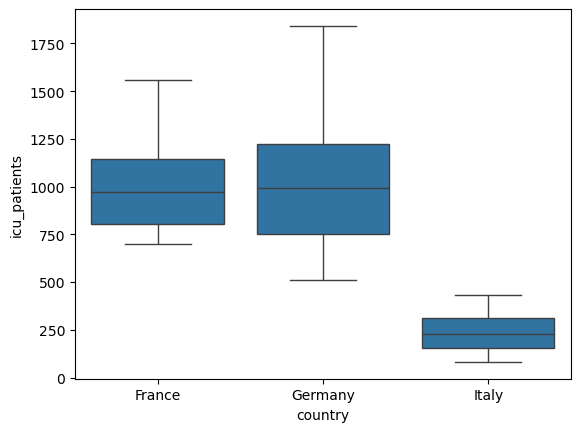

In [102]:
sns.boxplot(data=df_periodo, x='country', y='icu_patients')

In [ ]:
#Nell periodo maggio 2022 - aprile 2023, Germania e Francia presentano numero medio di pazienti in terapia intensiva simile (circa 1000 pazienti),
# mentre l'Italia mostra valori nettamente inferiori (circa 230). La Germania registra anche il valore massimo piu elevato, indicando maggiore 
# variabilita. Per Francia sono presenti alcuni valori mancanti (30),mantenuti tali per evitare distorsioni, il boxplot è stato generato usando
# solo i dati reali. Il grafico evidenzia chiaramente la distanza tra la distribuizione italiana e quella degli altri due paesi.

In [ ]:


#Esercizio 5 - Riguardo le nazioni di Italia, Germania, Francia e Espagna:
# mostrare in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna



In [59]:
df_4paesi = df[(df['country']=='Italy') |
                (df['country']=='Germany') |    # filtrando i paesi
                (df['country']=='France') |
                (df['country']=='Spain')]
df_4paesi.head()


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
166075,France,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166076,France,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166077,France,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166078,France,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166079,France,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN


In [60]:
df_4paesi.shape

(8612, 61)

In [ ]:
# filtrando il periodo di 2021, convertendo la colonna date in datetime

In [63]:
df_4paesi['date'].dtype

dtype('O')

In [65]:
df_4paesi['date'] = pd.to_datetime(df_4paesi['date'])

C:\Users\karin\AppData\Local\Temp\ipykernel_52260\2523366158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4paesi['date'] = pd.to_datetime(df_4paesi['date'])


In [66]:
df_2021=df_4paesi[df_4paesi['date'].dt.year==2021]
df_2021.head()

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
166441,France,2021-01-01,2338258.0,0.0,11984.000,36377.600,0.0000,186.44185,63534.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166442,France,2021-01-02,2338258.0,0.0,11984.000,36377.600,0.0000,186.44185,63534.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166443,France,2021-01-03,2427206.0,88948.0,12706.857,37761.414,1383.8143,197.68776,66449.0,2915.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166444,France,2021-01-04,2427206.0,0.0,12706.857,37761.414,0.0000,197.68776,66449.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN
166445,France,2021-01-05,2427206.0,0.0,12706.857,37761.414,0.0000,197.68776,66449.0,0.0,...,66277412.0,121.04203,41.567001,82.475304,45904.410156,0.069723,5.3,NaN,5.91,NaN


In [67]:
df_2021.shape

(1460, 61)

In [ ]:
#controllare i valori nulli nella colonna hosp_patients


In [68]:
df_2021['hosp_patients'].isna().sum()

365

In [69]:
df_2021[df_2021['hosp_patients'].isna()]['country'].value_counts()

country
Germany    365
Name: count, dtype: int64

In [ ]:
#Germania presenta tutti i valori NAN per il 2021 nella colonna hosp_patients
#La sostituizione con 0 non sarebbe metodologicamente correta poiche introdurebbe un'informazione non reale e altererebbe
#la comparazione. Pertanto la Germania verra esclusa dal grafico, ma mantenuta nella parte numerica con indicazione di 
#dati mancanti.

In [71]:
somme_2021 = df_2021.groupby('country')['hosp_patients'].sum() #calcolare la somma di hosp_patients per ogni paese ne 2021
somme_2021

country
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64

In [ ]:
#creare una tabella ordinata e leggibile

In [72]:
tabella_2021 = somme_2021.reset_index().rename(columns={'hosp_patients':'totale_hosp_patients_2021'})
tabella_2021
                                               

,country,totale_hosp_patients_2021
0,France,6008717.0
1,Germany,0.0
2,Italy,4419950.0
3,Spain,2411706.0


In [74]:
tabella_grafico = tabella_2021[tabella_2021['country'] != 'Germany'] #togliendo la germania per fare il grafico
tabella_grafico

,country,totale_hosp_patients_2021
0,France,6008717.0
2,Italy,4419950.0
3,Spain,2411706.0


In [ ]:
# costruendo il grafico totale pacienti hosp 2021 per paesi

<Axes: xlabel='country', ylabel='totale_hosp_patients_2021'>

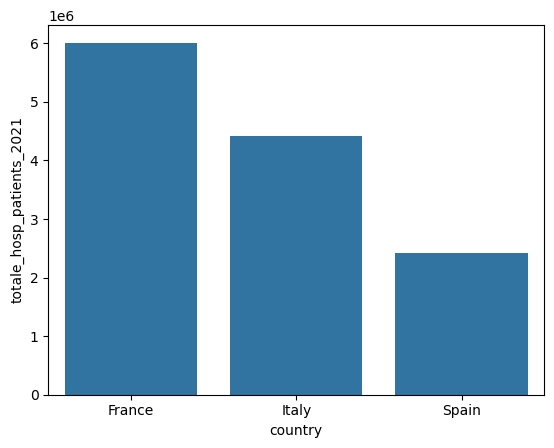

In [76]:
sns.barplot(data=tabella_grafico, x='country', y='totale_hosp_patients_2021')

In [ ]:
#Francia ha registrato il numero piu alto di ospedallizzazioni COVID nel 2021, seguita da Italia e Spagna.
# I dati per la Germania risultano completamente mancanti per la colonna hosp_patients nel 2021, impedendo il confronto diretto nel grafico.
# perche un valore mancante non è uguale a zero, non potevo inserire la gemania nel grafico perche l'inclusione con valore 0 avrebbe creato un
#risultato visivo furorviante, suggerendo erroneamente l'assenza di ospedalizzazioni. Pertanto come detto prima, Germania rimane nella tabella
# numerica con indicazione dei dati mancanti, ma vieni esclusa dalla visualizzazione grafica.